In [3]:
import pandas as pd
import numpy as np

In [452]:
df = pd.read_csv("C:/Users/tanne/Documents/SP 24/Sports/Project/ufc-master.csv")

C:\Users\tanne\AppData\Local\Temp\ipykernel_20768\2475852957.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/tanne/Documents/SP 24/Sports/Project/ufc-master.csv")


In [453]:
df_sub = df[['Date', 'Event-Code', 'Total-Rounds','Full Name', 'Fighter-2-Name', 'W', 'Decision - Split', 'Judge-1-Name', 'Judge-1-Score','Judge-2-Name', 'Judge-2-Score','Judge-3-Name', 'Judge-3-Score','Knockdowns', 'Significant-Strike-Land', 'Significant-Strike-Attempt', 'Total-Strikes-Land', 'Total-Strikes-Attempt', 'Takedown-Success', 'Takedown-Land', 'Control-Time-Sec']].loc[df['Decision - Split'] == 1]

In [454]:
df_sub.head(5)

,Date,Event-Code,Total-Rounds,Full Name,Fighter-2-Name,W,Decision - Split,Judge-1-Name,Judge-1-Score,Judge-2-Name,...,Judge-3-Name,Judge-3-Score,Knockdowns,Significant-Strike-Land,Significant-Strike-Attempt,Total-Strikes-Land,Total-Strikes-Attempt,Takedown-Success,Takedown-Land,Control-Time-Sec
9,2013-07-27 00:00:00,5330fe7e4c3af81c,3,Aaron Riley,Justin Salas,0,1,Sal D'amato,29 - 28,Lamont Nelson,...,Chris Lee,29 - 28,0,26,172,26,172,0,0,0
19,2012-02-15 00:00:00,0a97691039c4bbfb,3,Aaron Simpson,Ronny Markes,0,1,Steve Garrean,28 - 29,Sal D'amato,...,Glenn Trowbridge,28 - 29,1,55,84,75,104,0,5,148
20,2010-01-11 00:00:00,58bc81376286b3d3,3,Aaron Simpson,Tom Lawlor,1,1,Jeff Blatnick,28 - 29,Doug Crosby,...,Sal D'amato,29 - 28,0,36,108,74,149,2,6,268
32,2017-05-28 00:00:00,1c7cce2f5c17160d,3,Abdul Razak Alhassan,Omari Akhmedov,0,1,Mans Nilsson,27 - 30,Jorgen Segerlind,...,Andy Roberts,27 - 30,0,43,99,44,102,0,0,1
57,2018-03-03 00:00:00,7929be8290289a47,3,Adam Milstead,Jordan Johnson,0,1,Tony Weeks,28 - 29,Marcos Rosales,...,Chris Lee,28 - 29,0,58,133,70,145,0,0,0


In [455]:
# Assuming df_sub is your DataFrame

# Step 1: Prepare the DataFrames
df_original = df_sub.copy()
df_swapped = df_sub.copy()

# Swapping 'Full Name' and 'Fighter-2-Name' in df_swapped
df_swapped[['Full Name', 'Fighter-2-Name']] = df_swapped[['Fighter-2-Name', 'Full Name']]

# Step 2: Rename Columns in df_swapped
# Define columns to prefix (all except specified ones)
columns_to_prefix = [col for col in df_sub.columns if col not in ['Event-Code', 'Total-Rounds', 'Decision - Split', 'Judge-1-Name', 'Judge-2-Name', 'Judge-3-Name', 'Full Name', 'Fighter-2-Name']]
df_swapped = df_swapped.rename(columns={col: 'F2_' + col for col in columns_to_prefix})

# Step 3: Merge the DataFrames
# Merge on 'Event-Code', 'Full Name', and 'Fighter-2-Name'
final_df = pd.merge(df_original, df_swapped, on=['Event-Code', 'Full Name', 'Fighter-2-Name'], suffixes=('', '_swapped'))

final_df = final_df[final_df['Full Name'] <= final_df['Fighter-2-Name']]


# The final DataFrame 'final_df' now contains each fight's data in a single row, with stats for both fighters


In [456]:
final_df = final_df.rename(columns = {'W': 'F1_W',
                                      'Judge-1-Score': 'F1_Judge-1-Score',
                                      'Judge-2-Score': 'F1_Judge-2-Score', 
                                      'Judge-3-Score': 'F1_Judge-3-Score',
                                      'Full Name': 'Fighter_1',
                                      'Fighter-2-Name': 'Fighter_2'})


final_df = final_df.drop(['Total-Rounds_swapped', 'Judge-1-Name_swapped', 'Judge-2-Name_swapped', 'Judge-3-Name_swapped', 'Decision - Split_swapped'], axis=1)


# Columns to be prefixed
columns_to_prefix = [
    'Knockdowns', 'Significant-Strike-Land', 'Significant-Strike-Attempt',
    'Total-Strikes-Land', 'Total-Strikes-Attempt', 'Takedown-Success',
    'Takedown-Land', 'Control-Time-Sec'
]

# Creating the mapping of old column names to new names with the "F1_" prefix
new_column_names = {col: f'F1_{col}' for col in columns_to_prefix}

# Renaming the columns in the DataFrame
final_df = final_df.rename(columns=new_column_names)

In [457]:
final_df.head(5)

,Date,Event-Code,Total-Rounds,Fighter_1,Fighter_2,F1_W,Decision - Split,Judge-1-Name,F1_Judge-1-Score,Judge-2-Name,...,F2_Judge-2-Score,F2_Judge-3-Score,F2_Knockdowns,F2_Significant-Strike-Land,F2_Significant-Strike-Attempt,F2_Total-Strikes-Land,F2_Total-Strikes-Attempt,F2_Takedown-Success,F2_Takedown-Land,F2_Control-Time-Sec
0,2013-07-27 00:00:00,5330fe7e4c3af81c,3,Aaron Riley,Justin Salas,0,1,Sal D'amato,29 - 28,Lamont Nelson,...,29 - 28,28 - 29,0,54,140,58,144,3,9,30
1,2012-02-15 00:00:00,0a97691039c4bbfb,3,Aaron Simpson,Ronny Markes,0,1,Steve Garrean,28 - 29,Sal D'amato,...,28 - 29,29 - 28,0,62,97,78,115,2,6,319
2,2010-01-11 00:00:00,58bc81376286b3d3,3,Aaron Simpson,Tom Lawlor,1,1,Jeff Blatnick,28 - 29,Doug Crosby,...,28 - 29,28 - 29,0,52,128,60,136,1,6,157
3,2017-05-28 00:00:00,1c7cce2f5c17160d,3,Abdul Razak Alhassan,Omari Akhmedov,0,1,Mans Nilsson,27 - 30,Jorgen Segerlind,...,28 - 29,30 - 27,0,52,153,99,213,6,9,340
4,2018-03-03 00:00:00,7929be8290289a47,3,Adam Milstead,Jordan Johnson,0,1,Tony Weeks,28 - 29,Marcos Rosales,...,27 - 30,29 - 28,0,59,106,176,239,2,11,433


In [458]:
final_df = final_df.loc[(final_df['F1_W'] != 0) | (final_df['F2_W'] != 0)]
final_df

,Date,Event-Code,Total-Rounds,Fighter_1,Fighter_2,F1_W,Decision - Split,Judge-1-Name,F1_Judge-1-Score,Judge-2-Name,...,F2_Judge-2-Score,F2_Judge-3-Score,F2_Knockdowns,F2_Significant-Strike-Land,F2_Significant-Strike-Attempt,F2_Total-Strikes-Land,F2_Total-Strikes-Attempt,F2_Takedown-Success,F2_Takedown-Land,F2_Control-Time-Sec
0,2013-07-27 00:00:00,5330fe7e4c3af81c,3,Aaron Riley,Justin Salas,0,1,Sal D'amato,29 - 28,Lamont Nelson,...,29 - 28,28 - 29,0,54,140,58,144,3,9,30
1,2012-02-15 00:00:00,0a97691039c4bbfb,3,Aaron Simpson,Ronny Markes,0,1,Steve Garrean,28 - 29,Sal D'amato,...,28 - 29,29 - 28,0,62,97,78,115,2,6,319
2,2010-01-11 00:00:00,58bc81376286b3d3,3,Aaron Simpson,Tom Lawlor,1,1,Jeff Blatnick,28 - 29,Doug Crosby,...,28 - 29,28 - 29,0,52,128,60,136,1,6,157
3,2017-05-28 00:00:00,1c7cce2f5c17160d,3,Abdul Razak Alhassan,Omari Akhmedov,0,1,Mans Nilsson,27 - 30,Jorgen Segerlind,...,28 - 29,30 - 27,0,52,153,99,213,6,9,340
4,2018-03-03 00:00:00,7929be8290289a47,3,Adam Milstead,Jordan Johnson,0,1,Tony Weeks,28 - 29,Marcos Rosales,...,27 - 30,29 - 28,0,59,106,176,239,2,11,433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,2016-10-01 00:00:00,a196332ee4aa8a82,3,Shamil Abdurakhimov,Walt Harris,1,1,Marcos Rosales,29 - 28,Dave Hagen,...,29 - 28,29 - 28,0,33,98,36,101,0,0,29
1040,2010-09-25 00:00:00,ad32471f01e7b1a5,3,Steve Lopez,Waylon Lowe,0,1,Cecil Peoples,29 - 28,Dave Stone,...,29 - 28,28 - 29,0,26,61,74,118,5,7,412
1072,2005-02-05 00:00:00,85d905f7c4f5a1af,3,Tito Ortiz,Vitor Belfort,1,1,Nelson Hamilton,28 - 29,Cecil Peoples,...,29 - 28,28 - 29,0,19,38,44,65,0,0,186
1104,2016-12-10 00:00:00,6e3282d57d2467a0,3,Valerie Letourneau,Viviane Pereira,0,1,Eric Colon,28 - 29,Gregory Jackson,...,28 - 29,29 - 28,0,25,97,42,122,1,1,224


In [459]:
import pandas as pd

# List of stats to compute differentials
stats_to_diff = [
    'Knockdowns', 'Significant-Strike-Land', 'Significant-Strike-Attempt',
    'Total-Strikes-Land', 'Total-Strikes-Attempt', 'Takedown-Success',
    'Takedown-Land', 'Control-Time-Sec'
]

# Step 2: Calculate Differential Stats
for stat in stats_to_diff:
    # Construct column names for Fighter 1 and Fighter 2
    f1_col = f'F1_{stat}'
    f2_col = f'F2_{stat}'

    # Calculate differential based on who won
    # If Fighter 1 wins, differential is F1_stat - F2_stat; otherwise, it's F2_stat - F1_stat
    final_df[f'{stat}_Diff'] = final_df.apply(lambda x: x[f1_col] - x[f2_col] if x['F1_W'] == 1 else x[f2_col] - x[f1_col], axis=1)

# final_df now contains the new 'Fighter_1_Win' column and differential stats columns


In [460]:
final_df = final_df.dropna(subset = ['Judge-1-Name', 'Judge-2-Name', 'Judge-3-Name'])
final_df = final_df.sort_values('Date')
final_df['Date'] = pd.to_datetime(final_df['Date']).dt.strftime('%Y-%m-%d')

In [461]:
final_df

,Date,Event-Code,Total-Rounds,Fighter_1,Fighter_2,F1_W,Decision - Split,Judge-1-Name,F1_Judge-1-Score,Judge-2-Name,...,F2_Takedown-Land,F2_Control-Time-Sec,Knockdowns_Diff,Significant-Strike-Land_Diff,Significant-Strike-Attempt_Diff,Total-Strikes-Land_Diff,Total-Strikes-Attempt_Diff,Takedown-Success_Diff,Takedown-Land_Diff,Control-Time-Sec_Diff
302,2003-02-28,bba678d312590087,3,Din Thomas,Matt Serra,1,1,Steve Rice,28 - 30,Doug Crosby,...,28,86,0,3,-20,17,-5,-1,-28,19
448,2004-04-02,e8fb8e53bc2e29d6,3,Hermes Franca,Yves Edwards,0,1,Cecil Peoples,29 - 28,Tony Weeks,...,0,291,0,13,-1,3,-12,-4,-10,64
628,2004-08-21,b4bc2e3353a770b5,3,Karo Parisyan,Nick Diaz,1,1,Dalby Shirley,29 - 28,Cecil Peoples,...,2,78,0,-10,-23,-73,-85,8,13,336
1072,2005-02-05,85d905f7c4f5a1af,3,Tito Ortiz,Vitor Belfort,1,1,Nelson Hamilton,28 - 29,Cecil Peoples,...,0,186,0,8,9,57,65,4,11,377
194,2005-08-06,3f24c96753dbd9f9,3,Chris Leben,Patrick Cote,1,1,Jon Schorle,28 - 29,Roy Silbert,...,2,121,0,0,0,155,167,0,3,426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,2021-04-17,4a35913bd9aa4161,3,Justine Kish,Tracy Cortez,0,1,Derek Cleary,29 - 28,Sal D'amato,...,5,386,-1,11,-7,12,-2,3,4,348
522,2021-04-17,4a35913bd9aa4161,3,Jessica Penne,Loopy Godinez,1,1,Rick Winter,29 - 28,Mike Bell,...,9,250,0,-9,13,30,52,-2,-2,20
320,2021-04-24,27541033b97c076d,3,Dwight Grant,Stefan Sekulic,1,1,Howard Reichbach,28 - 29,Derek Cleary,...,7,124,0,16,104,13,101,-2,-6,-99
622,2021-05-01,d57e6a8971b6d2bd,3,Kai Kamaka,TJ Brown,0,1,Adalaide Byrd,30 - 27,Sal D'amato,...,4,36,-1,21,83,25,88,1,3,-302


# WEB SCRAPING AND SUCH

In [165]:
final_df['Fight_ID'] = np.nan

In [166]:
actual_ids_dates = [
    (902, '2007-11-17'),
    (956, '2008-02-02'), 
    (1083, '2008-09-17'),
    (1264, '2009-06-20'),
    (2355, '2011-03-03'),
    (3691, '2012-09-29'),
    (4344, '2013-07-27'),
    (5739, '2014-12-06'),
    (8519, '2017-10-28'),
    (9310, '2018-08-25'),
    (11887, '2021-05-01')
]

actual_ids_dates = [(id_, pd.Timestamp(date)) for id_, date in actual_ids_dates]

# Sort the anchor points by date
actual_ids_dates.sort(key=lambda x: x[1])

# Initialize an empty dictionary to store the interpolated IDs
interpolated_id_dict = {}

# Interpolate the IDs between each pair of adjacent anchor points
for i in range(len(actual_ids_dates) - 1):
    start_id, start_date = actual_ids_dates[i]
    end_id, end_date = actual_ids_dates[i + 1]
    
    # Generate dates between start_date and end_date (inclusive) at daily intervals
    interpolated_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Calculate the corresponding interpolated IDs for the interpolated dates
    # This calculates the slope of the line connecting the two anchor points and applies it to the range of dates
    total_days = (end_date - start_date).days
    id_increment_per_day = (end_id - start_id) / total_days
    interpolated_ids = np.round(start_id + (interpolated_dates - start_date).days * id_increment_per_day)
    
    # Update the dictionary with the interpolated IDs for the corresponding dates
    interpolated_id_dict.update(dict(zip(interpolated_dates, interpolated_ids)))

# Map the interpolated IDs to the 'Date' column of the DataFrame
final_df['Fight_ID'] = final_df['Date'].map(interpolated_id_dict).astype('Int64')

In [ ]:
## SCRAPING TIME

import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from unidecode import unidecode
from concurrent.futures import ThreadPoolExecutor, as_completed
import fuzzywuzzy

from fuzzywuzzy import fuzz

def normalize_text(text, for_comparison=True):
    """Normalize text for reliable matching: remove HTML tags, accents, and special characters.
       Set `for_comparison` to False to keep the original text formatting."""
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    if for_comparison:
        text = unidecode(text)  # Transliterate to closest ASCII representation
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keep only alphanumeric characters and spaces
        text = re.sub(r'\s+', ' ', text)  # Normalize whitespace to single spaces
        return text.lower()
    return text

def is_correct_page(soup, fighter_1, fighter_2, threshold=90):
    """Check if the page contains both fighters' names with fuzzy matching."""
    page_text = normalize_text(str(soup), for_comparison=True)
    fighter_1_normalized = normalize_text(fighter_1, for_comparison=True)
    fighter_2_normalized = normalize_text(fighter_2, for_comparison=True)
    
    # Use fuzzy matching to check for fighter names in the page text
    match_1 = fuzz.partial_ratio(fighter_1_normalized, page_text)
    match_2 = fuzz.partial_ratio(fighter_2_normalized, page_text)
    
    # Both names must meet or exceed the threshold to consider the page correct
    return match_1 >= threshold and match_2 >= threshold

def extract_judge_info(soup):
    """Extract judges' names and scores from the page, without altering judge names."""
    judge_info = {}
    judge_names = soup.find_all('td', class_='judge')
    # Find all 'td' elements for scores, then navigate to 'b' tag for the actual scores
    left_scores = [td.find('b').text for td in soup.find_all('td', class_='bottom-cell', align='center')]
    right_scores = left_scores[1::2]  # Assuming the pattern is left-right-left-right for scores, extract every second element starting from the second
    left_scores = left_scores[::2]  # Extract every second element starting from the first

    for i, (judge, left_score, right_score) in enumerate(zip(judge_names, left_scores, right_scores), start=1):
        # Extract judge names without normalizing
        judge_name = normalize_text(judge.get_text(), for_comparison=False)
        judge_info[f'Judge-{i}-Name'] = judge_name.strip()  # .strip() to remove leading/trailing whitespace
        # Scores are already extracted as text, so just format them
        judge_info[f'Judge-{i}-Score'] = f"{left_score}-{right_score}"

        if i == 3:  # Only consider up to 3 judges
            break

    return judge_info

from concurrent.futures import ThreadPoolExecutor, as_completed

def process_fight(fighter_1, fighter_2, estimated_fight_id, f1_won):
    print(f"Starting: {fighter_1} vs {fighter_2}")
    winning_fighter, losing_fighter = (fighter_1, fighter_2) if f1_won == 1 else (fighter_2, fighter_1)
    for fight_id in range(estimated_fight_id - 50, estimated_fight_id + 51):
        url = f"http://mmadecisions.com/decision/{fight_id}/{winning_fighter.replace(' ', '-')}-vs-{losing_fighter.replace(' ', '-')}"
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            if is_correct_page(soup, fighter_1, fighter_2):
                judge_info = extract_judge_info(soup)
                print(f"Completed: {fighter_1} vs {fighter_2} | Fight ID: {fight_id}")
                return {'Fighter_1': fighter_1, 'Fighter_2': fighter_2, 'Fight_ID': fight_id, 'F1_W': f1_won, **judge_info}
    print(f"Failed to find correct page for: {fighter_1} vs {fighter_2}")
    return None

def main(practice):
    with ThreadPoolExecutor(max_workers=10) as executor:
        futures = []
        for index, row in practice.iterrows():
            future = executor.submit(process_fight, row['Fighter_1'], row['Fighter_2'], row['Fight_ID'], row['F1_W'])
            futures.append(future)
            
        results = []
        for future in as_completed(futures):
            result = future.result()
            if result:
                results.append(result)
                # You can also print something here if you want to signal the completion of processing

    fight_data_df = pd.DataFrame(results)
    return fight_data_df

# Assuming 'practice' is your DataFrame
# Call the main function and pass your DataFrame
if __name__ == '__main__':
    fight_data_df = main(practice)
    if not fight_data_df.empty:
        print("Data extraction complete. Displaying partial data:")
        print(fight_data_df.head())
    else:
        print("No data was extracted. Please check the input and URL patterns.")


In [ ]:
fight_data_df['Judge-1-Name'] = fight_data_df['Judge-1-Name'].str.title()
fight_data_df['Judge-2-Name'] = fight_data_df['Judge-2-Name'].str.title()
fight_data_df['Judge-3-Name'] = fight_data_df['Judge-3-Name'].str.title()

fight_data_df.drop(['F1_W', 'Fight_ID'], axis = 1)

In [ ]:
fight_data_df.to_csv('fight_data.csv', index=False, encoding = 'utf-8-sig')

# JOINING DATA

In [462]:
final_df = final_df.sort_values('Date')
final_df = final_df.drop(['Judge-1-Name', 'Judge-2-Name', 'Judge-3-Name', 'F1_Judge-1-Score', 'F1_Judge-2-Score', 'F1_Judge-3-Score', 'F2_Judge-1-Score', 'F2_Judge-2-Score', 'F2_Judge-3-Score'], axis = 1)
final_df.head(5)

,Date,Event-Code,Total-Rounds,Fighter_1,Fighter_2,F1_W,Decision - Split,F1_Knockdowns,F1_Significant-Strike-Land,F1_Significant-Strike-Attempt,...,F2_Takedown-Land,F2_Control-Time-Sec,Knockdowns_Diff,Significant-Strike-Land_Diff,Significant-Strike-Attempt_Diff,Total-Strikes-Land_Diff,Total-Strikes-Attempt_Diff,Takedown-Success_Diff,Takedown-Land_Diff,Control-Time-Sec_Diff
302,2003-02-28,bba678d312590087,3,Din Thomas,Matt Serra,1,1,0,29,61,...,28,86,0,3,-20,17,-5,-1,-28,19
448,2004-04-02,e8fb8e53bc2e29d6,3,Hermes Franca,Yves Edwards,0,1,0,8,44,...,0,291,0,13,-1,3,-12,-4,-10,64
628,2004-08-21,b4bc2e3353a770b5,3,Karo Parisyan,Nick Diaz,1,1,0,27,79,...,2,78,0,-10,-23,-73,-85,8,13,336
1072,2005-02-05,85d905f7c4f5a1af,3,Tito Ortiz,Vitor Belfort,1,1,0,27,47,...,0,186,0,8,9,57,65,4,11,377
194,2005-08-06,3f24c96753dbd9f9,3,Chris Leben,Patrick Cote,1,1,0,26,63,...,2,121,0,0,0,155,167,0,3,426


In [463]:
final_df.columns

Index(['Date', 'Event-Code', 'Total-Rounds', 'Fighter_1', 'Fighter_2', 'F1_W',
       'Decision - Split', 'F1_Knockdowns', 'F1_Significant-Strike-Land',
       'F1_Significant-Strike-Attempt', 'F1_Total-Strikes-Land',
       'F1_Total-Strikes-Attempt', 'F1_Takedown-Success', 'F1_Takedown-Land',
       'F1_Control-Time-Sec', 'F2_Date', 'F2_W', 'F2_Knockdowns',
       'F2_Significant-Strike-Land', 'F2_Significant-Strike-Attempt',
       'F2_Total-Strikes-Land', 'F2_Total-Strikes-Attempt',
       'F2_Takedown-Success', 'F2_Takedown-Land', 'F2_Control-Time-Sec',
       'Knockdowns_Diff', 'Significant-Strike-Land_Diff',
       'Significant-Strike-Attempt_Diff', 'Total-Strikes-Land_Diff',
       'Total-Strikes-Attempt_Diff', 'Takedown-Success_Diff',
       'Takedown-Land_Diff', 'Control-Time-Sec_Diff'],
      dtype='object')

In [464]:
judges = pd.read_csv("C:/Users/tanne/Documents/SP 24/Sports/Project/fight_data.csv")
judges = judges.drop(['Fight_ID', 'F1_W'], axis = 1)
judges.head(5)

,Fighter_1,Fighter_2,Judge-1-Name,Judge-1-Score,Judge-2-Name,Judge-2-Score,Judge-3-Name,Judge-3-Score
0,Jess Liaudin,Paul Taylor,Barry Foley,28-29,Jeff Mullen,29-28,Andy Roberts,29-28
1,Nate Marquardt,Thales Leites,Nelson Hamilton,28-27,Cecil Peoples,28-27,Chris Watts,27-28
2,Keita Nakamura,Rob Emerson,Adalaide Byrd,30-27,Jeff Collins,28-29,Al Lefkowitz,30-27
3,Evan Tanner,Kendall Grove,Al Lefkowitz,28-29,Marcos Rosales,30-26,Glenn Trowbridge,30-26
4,Rich Clementi,Sam Stout,Douglas Crosby,29-27,Sylvain Leblanc,28-29,Pasquale Procopio,29-28


In [465]:
merged_df = pd.merge(final_df, judges, on=['Fighter_1', 'Fighter_2'], how='left')

# Renaming columns to avoid confusion (if necessary)
# This step is optional and depends on whether you need to differentiate between similar columns in the final DataFrame
# Example renaming for clarity
column_rename_map = {
    'Judge-1-Name': 'Judge-1-Name',
    'Judge-1-Score': 'Judge-1-Score',
    'Judge-2-Name': 'Judge-2-Name',
    'Judge-2-Score': 'Judge-2-Score',
    'Judge-3-Name': 'Judge-3-Name',
    'Judge-3-Score': 'Judge-3-Score'
}
merged_df.rename(columns=column_rename_map, inplace=True)

In [466]:
merged_df.dropna(subset = 'Judge-1-Score', inplace=True)
final_df = merged_df
final_df

,Date,Event-Code,Total-Rounds,Fighter_1,Fighter_2,F1_W,Decision - Split,F1_Knockdowns,F1_Significant-Strike-Land,F1_Significant-Strike-Attempt,...,Total-Strikes-Attempt_Diff,Takedown-Success_Diff,Takedown-Land_Diff,Control-Time-Sec_Diff,Judge-1-Name,Judge-1-Score,Judge-2-Name,Judge-2-Score,Judge-3-Name,Judge-3-Score
21,2007-11-17,1d147d4163a6989b,3,Michael Bisping,Rashad Evans,0,1,0,40,96,...,-4,4,14,428,Romulo Bittencourt,28-29,Eric Colón,29-28,Douglas Crosby,29-28
22,2008-02-02,597db668b01c442c,3,Keita Nakamura,Rob Emerson,0,1,1,57,191,...,17,-4,-4,-88,Adalaide Byrd,30-27,Jeff Collins,28-29,Al Lefkowitz,30-27
23,2008-03-01,598a58db87b890ee,3,Cheick Kongo,Heath Herring,0,1,0,45,60,...,15,-2,-1,-146,Todd Agosta,29-28,Nelson Hamilton,29-28,Cecil Peoples,28-29
24,2008-04-19,ad047e3073a775f3,3,Rich Clementi,Sam Stout,1,1,0,40,102,...,-49,3,8,312,Douglas Crosby,29-27,Sylvain Leblanc,28-29,Pasquale Procopio,29-28
25,2008-06-07,2efbc83a6b9b7f86,3,Nate Marquardt,Thales Leites,0,1,0,35,72,...,-22,-5,-6,-311,Nelson Hamilton,28-27,Cecil Peoples,28-27,Chris Watts,27-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,2021-04-17,4a35913bd9aa4161,3,Alexander Munoz,Luis Pena,0,1,0,80,169,...,23,-4,-9,-138,Michael Bell,28-29,Sal D'Amato,29-28,Rick Winter,29-28
547,2021-04-17,4a35913bd9aa4161,3,Justine Kish,Tracy Cortez,0,1,1,55,119,...,-2,3,4,348,Derek Cleary,29-28,Sal D'Amato,28-29,Rick Winter,30-27
549,2021-04-24,27541033b97c076d,3,Dwight Grant,Stefan Sekulic,1,1,0,49,156,...,101,-2,-6,-99,Derek Cleary,28-29,Chris Lee,29-28,Howard Reichbach,29-28
550,2021-05-01,d57e6a8971b6d2bd,3,Kai Kamaka,TJ Brown,0,1,1,61,128,...,88,1,3,-302,Michael Bell,29-28,Adalaide Byrd,27-30,Sal D'Amato,29-28


# CLUSTERING - FIGHTS

In [467]:
# Define the columns to be used in clustering
features_columns = []
for stat in stats_to_diff:
    f1_col = f'F1_{stat}'
    f2_col = f'F2_{stat}'
    diff_col = f'{stat}_Diff'
    
    features_columns.extend([f1_col, f2_col, diff_col])

# Extract the features from final_df
features = final_df[features_columns]


In [468]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
features_scaled = scaler.fit_transform(features)


c:\Users\tanne\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tanne\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tanne\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tanne\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

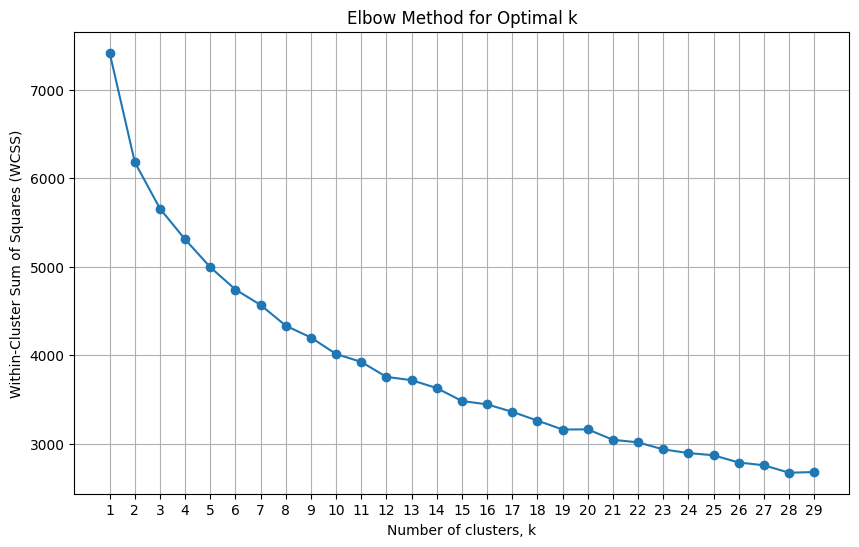

In [469]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'features_scaled' contains the scaled features for clustering

# Calculate within-cluster sum of squares (WCSS) for a range of k values
wcss = []
k_values = range(1, 30)  # Adjust the range based on your dataset size and computational considerations
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(-kmeans.score(features_scaled))  # Negative of inertia is WCSS

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, '-o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [470]:
from sklearn.cluster import KMeans

# Choose the number of clusters (k)
# As a starting point, let's use k=3, but you might want to experiment with this number or use methods like the elbow method to choose k
k = 6
# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the scaled features
kmeans.fit(features_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels back to final_df
final_df['Cluster'] = cluster_labels


c:\Users\tanne\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# ANALYZING CLUSTERS - FIGHTS

In [471]:
# Assuming 'final_df' already includes the 'Cluster' column and stats_to_diff list is defined

# List of original stats, their differentials, and 'Cluster' to use it for grouping
stats_to_include = []
for stat in stats_to_diff:
    stats_to_include.extend([f'F1_{stat}', f'F2_{stat}', f'{stat}_Diff'])

# Generate mean values for each stat in each cluster
cluster_means = final_df.groupby('Cluster')[stats_to_include].mean()

# Print the mean statistics for each cluster
cluster_means.filter(regex='_Diff')

,Knockdowns_Diff,Significant-Strike-Land_Diff,Significant-Strike-Attempt_Diff,Total-Strikes-Land_Diff,Total-Strikes-Attempt_Diff,Takedown-Success_Diff,Takedown-Land_Diff,Control-Time-Sec_Diff
Cluster,,,,,,,,
0,0.000000,-5.400000,-11.350000,5.900000,3.425000,3.175000,7.375000,239.650000
1,-0.147059,25.588235,65.558824,46.558824,89.323529,-0.588235,-0.735294,15.647059
2,-0.063291,6.329114,1.898734,6.405063,2.291139,0.405063,0.772152,25.708861
3,-0.135135,-7.486486,-16.540541,-20.351351,-29.810811,3.729730,6.972973,231.135135
4,-0.024390,0.000000,-21.853659,-7.487805,-30.609756,0.146341,-0.804878,-37.536585
5,0.166667,8.423077,13.487179,6.371795,11.487179,-2.000000,-5.756410,-119.179487


In [472]:
# Assuming 'final_df' already includes the 'Cluster' column and stats_to_diff list is defined

# List of original stats, their differentials, and 'Cluster' to use it for grouping
stats_to_include = ['Cluster']  # Start with Cluster for grouping
for stat in stats_to_diff:
    stats_to_include.extend([f'F1_{stat}', f'F2_{stat}', f'{stat}_Diff'])

# Adding the observation count for each cluster
cluster_counts = final_df.groupby('Cluster').size().rename('Observations')

# Generate mean values for each stat in each cluster
cluster_means = final_df.groupby('Cluster')[stats_to_include].mean()

# Joining the observations count with the means
cluster_means = cluster_means.join(cluster_counts)

# Calculate the proportion of fights with negative differentials for each cluster
for stat in stats_to_diff:
    differential_col = f'{stat}_Diff'
    negative_proportion_col = f'{stat}_Diff_Pos_Prop'
    cluster_means[negative_proportion_col] = final_df.groupby('Cluster')[differential_col].apply(lambda x: (x > 0).mean())

# Now, filter to show only differential stats and their negative proportions
columns_of_interest = ['Observations'] + [f'{stat}_Diff' for stat in stats_to_diff] + [f'{stat}_Diff_Pos_Prop' for stat in stats_to_diff]
cluster_summary = cluster_means.filter(items=columns_of_interest)

# Print the enhanced statistics for each cluster
cluster_summary

,Observations,Knockdowns_Diff,Significant-Strike-Land_Diff,Significant-Strike-Attempt_Diff,Total-Strikes-Land_Diff,Total-Strikes-Attempt_Diff,Takedown-Success_Diff,Takedown-Land_Diff,Control-Time-Sec_Diff,Knockdowns_Diff_Pos_Prop,Significant-Strike-Land_Diff_Pos_Prop,Significant-Strike-Attempt_Diff_Pos_Prop,Total-Strikes-Land_Diff_Pos_Prop,Total-Strikes-Attempt_Diff_Pos_Prop,Takedown-Success_Diff_Pos_Prop,Takedown-Land_Diff_Pos_Prop,Control-Time-Sec_Diff_Pos_Prop
Cluster,,,,,,,,,,,,,,,,,
0,40,0.000000,-5.400000,-11.350000,5.900000,3.425000,3.175000,7.375000,239.650000,0.050000,0.325000,0.325000,0.600000,0.500000,0.950000,0.925000,0.850000
1,34,-0.147059,25.588235,65.558824,46.558824,89.323529,-0.588235,-0.735294,15.647059,0.058824,0.852941,0.970588,0.911765,1.000000,0.235294,0.294118,0.529412
2,79,-0.063291,6.329114,1.898734,6.405063,2.291139,0.405063,0.772152,25.708861,0.075949,0.683544,0.481013,0.670886,0.544304,0.392405,0.468354,0.518987
3,37,-0.135135,-7.486486,-16.540541,-20.351351,-29.810811,3.729730,6.972973,231.135135,0.027027,0.270270,0.216216,0.324324,0.324324,1.000000,0.972973,0.891892
4,41,-0.024390,0.000000,-21.853659,-7.487805,-30.609756,0.146341,-0.804878,-37.536585,0.097561,0.487805,0.390244,0.390244,0.341463,0.341463,0.463415,0.390244
5,78,0.166667,8.423077,13.487179,6.371795,11.487179,-2.000000,-5.756410,-119.179487,0.179487,0.717949,0.653846,0.615385,0.641026,0.128205,0.115385,0.230769


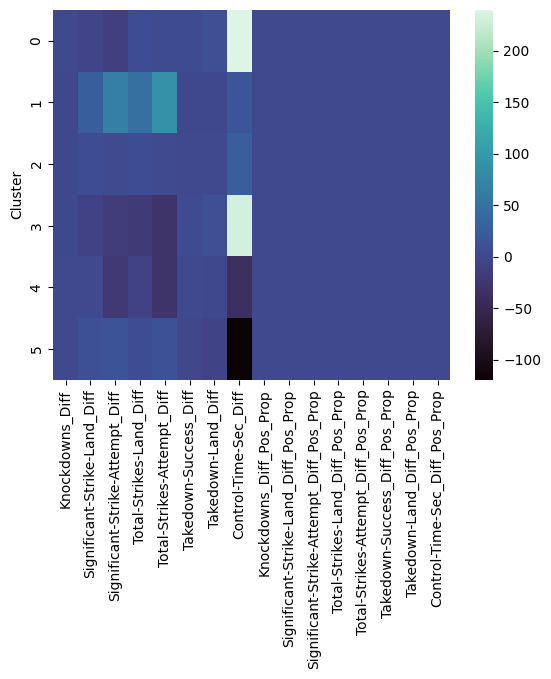

In [473]:
# heatmap
import seaborn as sns 
import matplotlib.pyplot as plt 

df = cluster_means.filter(regex='_Diff')
sns.heatmap(df, cmap = "mako")
#sns.color_palette("mako", as_cmap = True)
plt.show()


In [409]:
final_df[final_df['Cluster'] == 4]

,Date,Event-Code,Total-Rounds,Fighter_1,Fighter_2,F1_W,Decision - Split,F1_Knockdowns,F1_Significant-Strike-Land,F1_Significant-Strike-Attempt,...,Takedown-Success_Diff,Takedown-Land_Diff,Control-Time-Sec_Diff,Judge-1-Name,Judge-1-Score,Judge-2-Name,Judge-2-Score,Judge-3-Name,Judge-3-Score,Cluster
22,2008-02-02,597db668b01c442c,3,Keita Nakamura,Rob Emerson,0,1,1,57,191,...,-4,-4,-88,Adalaide Byrd,30-27,Jeff Collins,28-29,Al Lefkowitz,30-27,4
36,2009-01-17,68c6cd5287b473a7,3,Chris Lytle,Marcus Davis,0,1,0,73,198,...,0,1,3,Chris Lee,29-28,Andy Roberts,29-28,Tim Vannatta,28-29,4
124,2012-09-22,53e533db1b8e9712,5,Demetrious Johnson,Joseph Benavidez,1,1,0,77,156,...,5,3,-64,Richard Bertrand,47-48,Jeff Blatnick,48-47,Douglas Crosby,49-46,4
135,2012-12-29,c6e6926a81adcd00,3,Leonard Garcia,Max Holloway,0,1,0,89,359,...,-2,-4,-90,Cecil Peoples,29-28,Marcos Rosales,29-28,Mark Smith,28-29,4
147,2013-03-16,f1b2a4365799c48b,3,Chris Camozzi,Nick Ring,1,1,0,64,247,...,0,-1,20,Richard Bertrand,29-28,Sal D'Amato,29-28,Benoit Roussel,28-29,4
152,2013-05-25,3c241737a6069b9f,3,Dennis Bermudez,Max Holloway,1,1,0,73,225,...,4,8,200,Lester Griffin,29-28,Mark Smith,29-28,Tony Weeks,28-29,4
154,2013-06-08,7865707fd684d77b,3,Mizuto Hirota,Rodrigo Damm,0,1,0,102,199,...,2,6,104,Mark Collett,28-29,Glenn Trowbridge,29-28,Dean Weir,29-28,4
173,2013-10-09,43612456979e5d5e,3,Fabio Maldonado,Joey Beltran,1,1,0,87,168,...,-1,-4,-329,Richard Bertrand,28-29,Guilherme Bravo,29-28,Sal D'Amato,29-28,4
178,2013-11-16,28f3c2258a1d8874,5,Georges St-Pierre,Johny Hendricks,1,1,0,101,221,...,1,2,-156,Sal D'Amato,48-47,Glenn Trowbridge,47-48,Tony Weeks,48-47,4
198,2014-04-16,f9f07bb5a43535ed,3,Mark Bocek,Mike de la Torre,1,1,0,70,171,...,2,11,306,Richard Bertrand,28-29,Sal D'Amato,29-28,Erick Philippeaux,30-27,4


# VISUALIZING CLUSTERS - FIGHTS

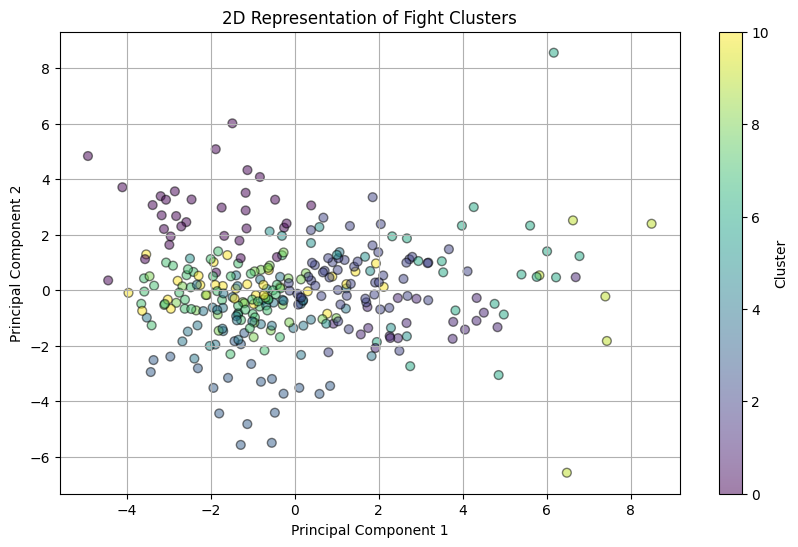

In [422]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA and reduce the data into two components
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features_scaled)

# Plot the reduced data points
plt.figure(figsize=(10, 6))

# Scatter plot of the first two principal components, colored by cluster labels
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=40, alpha=0.5)

# Styling the plot
plt.title('2D Representation of Fight Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.show()


C:\Users\tanne\AppData\Local\Temp\ipykernel_20768\2132514131.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(points_in_cluster[simplex, 0], points_in_cluster[simplex, 1], 'k-', color='red')  # Connect outermost points


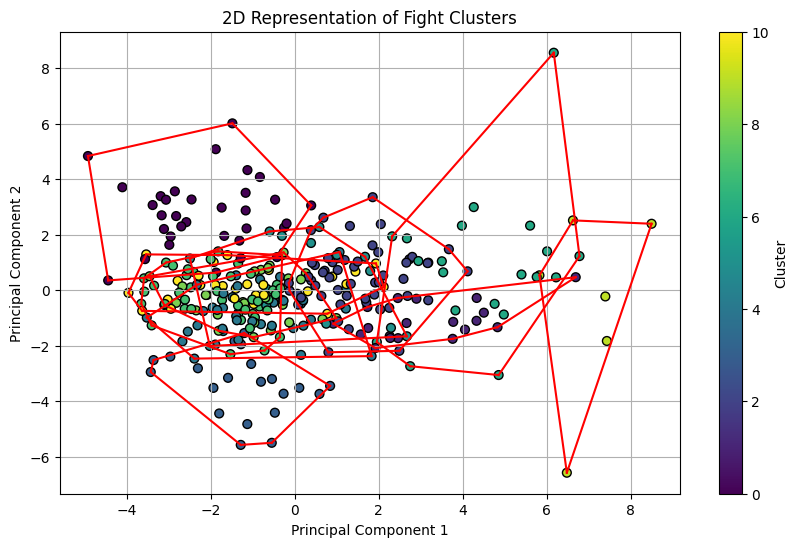

In [423]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

# Apply PCA and reduce the data into two components
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features_scaled)

# Plot the reduced data points
plt.figure(figsize=(10, 6))

# Scatter plot of the first two principal components, colored by cluster labels
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=40, alpha=1)

# Styling the plot
plt.title('2D Representation of Fight Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

# Plot convex hulls for each cluster
for i in range(len(np.unique(cluster_labels))):
    points_in_cluster = features_reduced[cluster_labels == i]
    hull = ConvexHull(points_in_cluster)
    for simplex in hull.simplices:
        plt.plot(points_in_cluster[simplex, 0], points_in_cluster[simplex, 1], 'k-', color='red')  # Connect outermost points

plt.show()


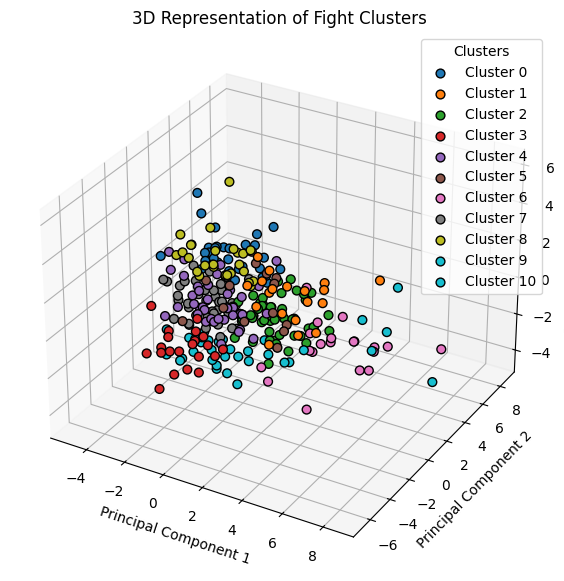

In [424]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Apply PCA and reduce the data into three components
pca = PCA(n_components=3)
features_reduced_3d = pca.fit_transform(features_scaled)

# Plot the reduced data points in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Determine unique clusters and assign colors
unique_clusters = np.unique(cluster_labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))  # Generates colors from the colormap

# Map each cluster label to a color
color_map = dict(zip(unique_clusters, colors))

# 3D scatter plot with discrete colors for each cluster
for cluster in unique_clusters:
    cluster_points = features_reduced_3d[cluster_labels == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
               color=color_map[cluster], edgecolor='k', s=40, alpha=1, label=f'Cluster {cluster}')

# Styling the plot
ax.set_title('3D Representation of Fight Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(title='Clusters')
plt.show()


# JUDGE ANALYSIS - EDA

In [474]:
final_df2 = final_df.copy()

In [475]:
final_df2.columns

Index(['Date', 'Event-Code', 'Total-Rounds', 'Fighter_1', 'Fighter_2', 'F1_W',
       'Decision - Split', 'F1_Knockdowns', 'F1_Significant-Strike-Land',
       'F1_Significant-Strike-Attempt', 'F1_Total-Strikes-Land',
       'F1_Total-Strikes-Attempt', 'F1_Takedown-Success', 'F1_Takedown-Land',
       'F1_Control-Time-Sec', 'F2_Date', 'F2_W', 'F2_Knockdowns',
       'F2_Significant-Strike-Land', 'F2_Significant-Strike-Attempt',
       'F2_Total-Strikes-Land', 'F2_Total-Strikes-Attempt',
       'F2_Takedown-Success', 'F2_Takedown-Land', 'F2_Control-Time-Sec',
       'Knockdowns_Diff', 'Significant-Strike-Land_Diff',
       'Significant-Strike-Attempt_Diff', 'Total-Strikes-Land_Diff',
       'Total-Strikes-Attempt_Diff', 'Takedown-Success_Diff',
       'Takedown-Land_Diff', 'Control-Time-Sec_Diff', 'Judge-1-Name',
       'Judge-1-Score', 'Judge-2-Name', 'Judge-2-Score', 'Judge-3-Name',
       'Judge-3-Score', 'Cluster'],
      dtype='object')

In [476]:
# Assuming your DataFrame is called final_df and includes 'Judge-1-Score', 'Judge-2-Score', and 'Judge-3-Score' columns

# Function to parse the score and determine agreement
def judge_agreement(score):
    if pd.isna(score):
        return np.nan  # Return NaN if the score is NaN
    first, second = map(int, score.split('-'))
    return int(first > second)

# Apply the function to each judge's score column to create the agreement columns
for i in range(1, 4):  # Assuming there are 3 judges
    score_col = f'Judge-{i}-Score'
    agreement_col = f'Judge-{i}-Agreement'
    final_df2[agreement_col] = final_df2[score_col].apply(judge_agreement)

# Now, final_df includes 'Judge-1-Agreement', 'Judge-2-Agreement', and 'Judge-3-Agreement' columns


In [477]:
analysis = final_df2[['Fighter_1', 'Fighter_2', 'F1_W', 'Judge-1-Name', 'Judge-2-Name', 'Judge-3-Name' ,'Judge-1-Score', 'Judge-2-Score', 'Judge-3-Score', 'Judge-1-Agreement', 'Judge-2-Agreement', 'Judge-3-Agreement', 'Cluster']]

In [478]:
analysis

,Fighter_1,Fighter_2,F1_W,Judge-1-Name,Judge-2-Name,Judge-3-Name,Judge-1-Score,Judge-2-Score,Judge-3-Score,Judge-1-Agreement,Judge-2-Agreement,Judge-3-Agreement,Cluster
21,Michael Bisping,Rashad Evans,0,Romulo Bittencourt,Eric Colón,Douglas Crosby,28-29,29-28,29-28,0,1,1,3
22,Keita Nakamura,Rob Emerson,0,Adalaide Byrd,Jeff Collins,Al Lefkowitz,30-27,28-29,30-27,1,0,1,4
23,Cheick Kongo,Heath Herring,0,Todd Agosta,Nelson Hamilton,Cecil Peoples,29-28,29-28,28-29,1,1,0,5
24,Rich Clementi,Sam Stout,1,Douglas Crosby,Sylvain Leblanc,Pasquale Procopio,29-27,28-29,29-28,1,0,1,0
25,Nate Marquardt,Thales Leites,0,Nelson Hamilton,Cecil Peoples,Chris Watts,28-27,28-27,27-28,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,Alexander Munoz,Luis Pena,0,Michael Bell,Sal D'Amato,Rick Winter,28-29,29-28,29-28,0,1,1,4
547,Justine Kish,Tracy Cortez,0,Derek Cleary,Sal D'Amato,Rick Winter,29-28,28-29,30-27,1,0,1,3
549,Dwight Grant,Stefan Sekulic,1,Derek Cleary,Chris Lee,Howard Reichbach,28-29,29-28,29-28,0,1,1,5
550,Kai Kamaka,TJ Brown,0,Michael Bell,Adalaide Byrd,Sal D'Amato,29-28,27-30,29-28,1,0,1,1


In [479]:
import pandas as pd

# Step 1: Collect unique judges
judges = pd.concat([analysis['Judge-1-Name'], analysis['Judge-2-Name'], analysis['Judge-3-Name']]).unique()

# Prepare a DataFrame to store results
judges_analysis = []

# Step 2: Iterate over each judge and cluster
for judge in judges:
    for cluster in analysis['Cluster'].unique():
        cluster_data = analysis[analysis['Cluster'] == cluster]
        total_judgments = 0
        agreements = 0
        
        for i in range(1, 4):
            judge_i_data = cluster_data[cluster_data[f'Judge-{i}-Name'] == judge]
            total_judgments += len(judge_i_data)
            agreements += judge_i_data[f'Judge-{i}-Agreement'].sum()
        
        # Avoid division by zero and ensure judge has judged at least one fight in this cluster
        if total_judgments > 0:
            judges_analysis.append({
                'Judge': judge,
                'Cluster': cluster,
                'Total Judgments': total_judgments,
                'Agreement Proportion': agreements / total_judgments
            })

# Convert results into a DataFrame
judges_analysis_df = pd.DataFrame(judges_analysis)

# Step 3: Filter out judges with fewer than 3 total judgments
judges_filtered = judges_analysis_df[judges_analysis_df['Total Judgments'] >= 0]


In [480]:
# Replace non-breaking spaces in the 'Judge' column
judges_filtered['Judge'] = judges_filtered['Judge'].str.replace('\xa0', ' ', regex=False)

# Now, try filtering for "Rick Winter" again
rick_winter_df = judges_filtered[judges_filtered['Judge'] == "Rick Winter"]

# Check if the DataFrame is no longer empty
if not rick_winter_df.empty:
    print("DataFrame contains rows for Rick Winter.")
else:
    print("No rows found for Rick Winter, check for other issues.")

DataFrame contains rows for Rick Winter.


In [481]:
# Assuming 'analysis' DataFrame has been pre-processed for judge names

# Initialize an empty DataFrame to hold aggregated data, with "Judge" as a column
judges_stats = pd.DataFrame(columns=['Judge'])

# Extract unique judges for iteration
unique_judges = pd.concat([analysis['Judge-1-Name'], analysis['Judge-2-Name'], analysis['Judge-3-Name']]).unique()

# Add unique judges to the DataFrame
judges_stats['Judge'] = unique_judges

# Set a temporary DataFrame to accumulate judge agreements and counts
temp_df = pd.DataFrame()

for i in range(1, 4):
    # Accumulate data for each Judge-i
    subset = analysis[['Cluster', f'Judge-{i}-Name', f'Judge-{i}-Agreement']].copy()
    subset.rename(columns={f'Judge-{i}-Name': 'Judge', f'Judge-{i}-Agreement': 'Agreement'}, inplace=True)
    
    # Append to temporary DataFrame
    temp_df = pd.concat([temp_df, subset], ignore_index=True)

# Drop NaNs (rows where judge names might be missing)
temp_df.dropna(subset=['Judge'], inplace=True)

# Calculate counts and proportions
count_df = temp_df.groupby(['Judge', 'Cluster']).size().unstack(fill_value=0)
prop_df = temp_df.groupby(['Judge', 'Cluster'])['Agreement'].mean().unstack()

# Convert counts to integers
count_df = count_df.astype(int)

# Rename columns for clarity
count_df.columns = [f'Cluster_{c}_Count' for c in count_df.columns]
prop_df.columns = [f'Cluster_{c}_Prop' for c in prop_df.columns]

# Calculate total counts and overall proportions
total_count = count_df.sum(axis=1)
total_agreements = temp_df.groupby('Judge')['Agreement'].sum()

judges_stats = judges_stats.set_index('Judge').join(count_df).join(prop_df)
judges_stats['Total_Count'] = total_count
judges_stats['Total_Agreements'] = total_agreements
judges_stats['Overall_Prop'] = judges_stats['Total_Agreements'] / judges_stats['Total_Count']

# Reset index to have "Judge" as a column
judges_stats.reset_index(inplace=True)

# Filter out judges with less than 3 total judgments
judges_stats = judges_stats[judges_stats['Total_Count'] >= 3]

# Cleanup before display (optional, depending on your preference)
judges_stats.drop(columns=['Total_Agreements'], inplace=True)

# Display the final DataFrame
print(judges_stats)


               Judge  Cluster_0_Count  Cluster_1_Count  Cluster_2_Count  \
1      Adalaide Byrd                2                1               10   
3     Douglas Crosby                5                0                5   
4    Nelson Hamilton                1                0                0   
5        Barry Foley                2                0                4   
6       Al Lefkowitz                0                0                0   
..               ...              ...              ...              ...   
150    Troy Wincapaw                3                0                1   
153        Joe Soliz                0                0                1   
155  Paul Sutherland                2                3                4   
161  Barry Luxenberg                0                0                1   
175   Clemens Werner                1                0                1   

     Cluster_3_Count  Cluster_4_Count  Cluster_5_Count  Cluster_0_Prop  \
1                  1     

In [482]:
judges_stats['Judge'] = judges_stats['Judge'].str.replace('\xa0', ' ', regex=False)
judges_stats[judges_stats['Total_Count'] >= 20].sort_values('Total_Count', ascending = False)

,Judge,Cluster_0_Count,Cluster_1_Count,Cluster_2_Count,Cluster_3_Count,Cluster_4_Count,Cluster_5_Count,Cluster_0_Prop,Cluster_1_Prop,Cluster_2_Prop,Cluster_3_Prop,Cluster_4_Prop,Cluster_5_Prop,Total_Count,Overall_Prop
14,Sal D'Amato,8,15,13,9,16,12,0.875,0.80,0.692308,0.555556,0.687500,0.583333,73,0.698630
8,Chris Lee,10,8,15,5,5,12,0.500,0.50,0.733333,0.600000,0.800000,0.583333,55,0.618182
37,Derek Cleary,3,5,13,1,7,14,1.000,0.60,0.769231,1.000000,0.857143,0.642857,43,0.744186
40,Marcos Rosales,4,2,10,7,5,9,0.500,0.50,0.700000,0.571429,0.800000,0.777778,37,0.675676
81,Tony Weeks,1,2,7,2,6,9,1.000,1.00,0.857143,1.000000,0.500000,0.777778,27,0.777778
19,Junichiro Kamijo,3,4,5,3,1,8,1.000,0.50,0.800000,0.666667,1.000000,0.875000,24,0.791667
3,Douglas Crosby,5,0,5,3,2,7,0.600,NaN,0.400000,0.666667,1.000000,0.857143,22,0.681818
9,Dave Hagen,2,1,5,3,3,8,0.500,1.00,0.400000,0.666667,0.666667,0.750000,22,0.636364
73,Glenn Trowbridge,1,3,2,2,4,9,1.000,1.00,1.000000,0.000000,0.500000,0.333333,21,0.523810
22,Michael Bell,0,4,5,5,4,2,NaN,0.75,0.800000,0.800000,0.250000,1.000000,20,0.700000


In [483]:
column_indices = [0] + list(range(7, 15))

# Use .iloc to select all rows and the specified columns
selected_data = judges_stats.iloc[:, column_indices]
selected_data

,Judge,Cluster_0_Prop,Cluster_1_Prop,Cluster_2_Prop,Cluster_3_Prop,Cluster_4_Prop,Cluster_5_Prop,Total_Count,Overall_Prop
1,Adalaide Byrd,0.5,0.000000,0.50,1.000000,1.0,0.000000,17,0.529412
3,Douglas Crosby,0.6,NaN,0.40,0.666667,1.0,0.857143,22,0.681818
4,Nelson Hamilton,1.0,NaN,NaN,1.000000,NaN,0.800000,8,0.875000
5,Barry Foley,0.5,NaN,0.50,1.000000,1.0,0.333333,11,0.545455
6,Al Lefkowitz,NaN,NaN,NaN,0.000000,1.0,0.000000,3,0.333333
...,...,...,...,...,...,...,...,...,...
150,Troy Wincapaw,1.0,NaN,1.00,NaN,NaN,NaN,4,1.000000
153,Joe Soliz,NaN,NaN,0.00,1.000000,NaN,1.000000,3,0.666667
155,Paul Sutherland,0.5,0.666667,0.75,NaN,NaN,0.000000,10,0.600000
161,Barry Luxenberg,NaN,NaN,0.00,0.000000,1.0,NaN,3,0.333333


In [484]:
# Assuming 'judges_stats' is structured with 'Cluster_X_Count' and 'Cluster_X_Prop' for each cluster X
judges_stats = judges_stats[judges_stats['Total_Count'] >= 20]

# Extract unique cluster identifiers from the column names
clusters = set(col.split('_')[1] for col in judges_stats.columns if 'Cluster' in col)

# Initialize a dictionary to store the weighted mean proportions for each cluster
cluster_weighted_means = {}

# Calculate weighted mean proportion for each cluster
for cluster in clusters:
    count_col = f'Cluster_{cluster}_Count'
    prop_col = f'Cluster_{cluster}_Prop'
    
    # Calculate the product of count and proportion for each judge
    judges_stats[f'{cluster}_Weighted_Product'] = judges_stats[count_col] * judges_stats[prop_col]
    
    # Sum of products divided by total counts for the cluster
    total_product_sum = judges_stats[f'{cluster}_Weighted_Product'].sum()
    total_count_sum = judges_stats[count_col].sum()
    
    # Avoid division by zero
    if total_count_sum > 0:
        cluster_weighted_means[cluster] = total_product_sum / total_count_sum
    else:
        cluster_weighted_means[cluster] = None

# Convert the dictionary to a DataFrame for easier viewing/manipulation
cluster_weighted_means_df = pd.DataFrame(list(cluster_weighted_means.items()), columns=['Cluster', 'Weighted_Mean_Prop'])

# Display the weighted mean proportions for each cluster
cluster_weighted_means_df.sort_values('Cluster', ignore_index= True)

,Cluster,Weighted_Mean_Prop
0,0,0.702703
1,1,0.704545
2,2,0.712500
3,3,0.625000
4,4,0.679245
5,5,0.677778


In [485]:
# Ensure cluster IDs are consistent between DataFrames
cluster_weighted_means_df['Cluster'] = cluster_weighted_means_df['Cluster'].astype(str)

# Iterate through each cluster to adjust the judges_stats DataFrame
for i in range(k):  # Assuming clusters are numbered from 0 to 7
    cluster_id = str(i)
    # Find the weighted mean proportion for the current cluster
    weighted_mean_prop = cluster_weighted_means_df.loc[cluster_weighted_means_df['Cluster'] == cluster_id, 'Weighted_Mean_Prop'].values[0]
    
    # Calculate the difference between each judge's proportion and the weighted mean for the cluster
    judges_stats[f'Cluster_{i}_Prop_Diff'] = judges_stats[f'Cluster_{i}_Prop'] - weighted_mean_prop

# Now filter based on your conditions
for i in range(k):
    cluster_count_col = f'Cluster_{i}_Count'
    cluster_prop_diff_col = f'Cluster_{i}_Prop_Diff'
    
    # Judges with count >= 5 and prop difference >= 0.1 or <= -0.1 for the cluster
    condition_met = judges_stats[(judges_stats[cluster_count_col] >= 5) & 
                                 (abs(judges_stats[cluster_prop_diff_col]) >= 0.1)]
    
    if not condition_met.empty:
        print(f"Cluster {i} Conditions Met:")
        print(condition_met[['Judge', cluster_count_col, f'Cluster_{i}_Prop', cluster_prop_diff_col]], '\n')


Cluster 0 Conditions Met:
             Judge  Cluster_0_Count  Cluster_0_Prop  Cluster_0_Prop_Diff
3   Douglas Crosby                5           0.600            -0.102703
8        Chris Lee               10           0.500            -0.202703
14     Sal D'Amato                8           0.875             0.172297 

Cluster 1 Conditions Met:
           Judge  Cluster_1_Count  Cluster_1_Prop  Cluster_1_Prop_Diff
8      Chris Lee                8             0.5            -0.204545
37  Derek Cleary                5             0.6            -0.104545 

Cluster 2 Conditions Met:
             Judge  Cluster_2_Count  Cluster_2_Prop  Cluster_2_Prop_Diff
3   Douglas Crosby                5        0.400000            -0.312500
9       Dave Hagen                5        0.400000            -0.312500
81      Tony Weeks                7        0.857143             0.144643 

Cluster 3 Conditions Met:
           Judge  Cluster_3_Count  Cluster_3_Prop  Cluster_3_Prop_Diff
22  Michael Bell      

# JUDGE ANALYSIS - LOGISTIC REGRESSION

In [559]:
unique_judges = pd.concat([analysis['Judge-1-Name'], analysis['Judge-2-Name'], analysis['Judge-3-Name']]).str.replace('\xa0', ' ', regex=False).unique()

In [560]:
# Creating long format DataFrame for judge names
judges_names_long = pd.melt(analysis, id_vars=['Cluster', 'Fighter_1', 'Fighter_2'], 
                            value_vars=['Judge-1-Name', 'Judge-2-Name', 'Judge-3-Name'],
                            var_name='Judge_Position', value_name='Judge_Name')

# Creating long format DataFrame for judge agreements
judges_agreement_long = pd.melt(analysis, id_vars=['Cluster', 'Fighter_1', 'Fighter_2'], 
                                value_vars=['Judge-1-Agreement', 'Judge-2-Agreement', 'Judge-3-Agreement'],
                                var_name='Judge_Position', value_name='Agreement')

# Extracting judge numbers to align names with agreements
judges_names_long['Judge_Number'] = judges_names_long['Judge_Position'].str.extract('(\d+)')
judges_agreement_long['Judge_Number'] = judges_agreement_long['Judge_Position'].str.extract('(\d+)')

# Dropping unnecessary 'Judge_Position' columns
judges_names_long.drop('Judge_Position', axis=1, inplace=True)
judges_agreement_long.drop('Judge_Position', axis=1, inplace=True)

# Merging on common identifiers and judge number
judges_reaction_df = pd.merge(judges_names_long, judges_agreement_long, 
                              on=['Cluster', 'Fighter_1', 'Fighter_2', 'Judge_Number'])

# Dropping 'Judge_Number' as it's no longer needed
judges_reaction_df.drop('Judge_Number', axis=1, inplace=True)

# Display the first few rows of the resulting DataFrame
judges_reaction_df.head()


,Cluster,Fighter_1,Fighter_2,Judge_Name,Agreement
0,3,Michael Bisping,Rashad Evans,Romulo Bittencourt,0
1,4,Keita Nakamura,Rob Emerson,Adalaide Byrd,1
2,5,Cheick Kongo,Heath Herring,Todd Agosta,1
3,0,Rich Clementi,Sam Stout,Douglas Crosby,1
4,5,Nate Marquardt,Thales Leites,Nelson Hamilton,1


In [561]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'analysis' is your DataFrame
# First, we reshape the DataFrame so each row corresponds to a judge's reaction to a fight
reshaped_data = []

# Iterate over each row in the analysis DataFrame
for index, row in analysis.iterrows():
    for i in range(1, 4):
        reshaped_data.append({
            'Cluster': row['Cluster'],
            'Fighter_1': row['Fighter_1'],
            'Fighter_2': row['Fighter_2'],
            'Judge_Name': row[f'Judge-{i}-Name'],
            'Agreement': row[f'Judge-{i}-Agreement']
        })

# Convert the reshaped data into a DataFrame
judges_reaction_df = pd.DataFrame(reshaped_data)

# One-hot encode the 'Cluster' column
ohe = OneHotEncoder(sparse=False, dtype=int)
cluster_encoded = ohe.fit_transform(judges_reaction_df[['Cluster']])

# Create DataFrame from the encoded features, with appropriate column names
cluster_encoded_df = pd.DataFrame(cluster_encoded, columns=ohe.get_feature_names_out(['Cluster']))

# Concatenate the original DataFrame (minus 'Cluster' column) with the new one-hot encoded DataFrame
judges_reaction_df_encoded = pd.concat([judges_reaction_df.drop('Cluster', axis=1).reset_index(drop=True), 
                                        cluster_encoded_df.reset_index(drop=True)], axis=1)

# Display the final DataFrame
print(judges_reaction_df_encoded.head())


         Fighter_1     Fighter_2          Judge_Name  Agreement  Cluster_0  \
0  Michael Bisping  Rashad Evans  Romulo Bittencourt          0          0   
1  Michael Bisping  Rashad Evans          Eric Colón          1          0   
2  Michael Bisping  Rashad Evans      Douglas Crosby          1          0   
3   Keita Nakamura   Rob Emerson       Adalaide Byrd          1          0   
4   Keita Nakamura   Rob Emerson        Jeff Collins          0          0   

   Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  
0          0          0          1          0          0  
1          0          0          1          0          0  
2          0          0          1          0          0  
3          0          0          0          1          0  
4          0          0          0          1          0  


c:\Users\tanne\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


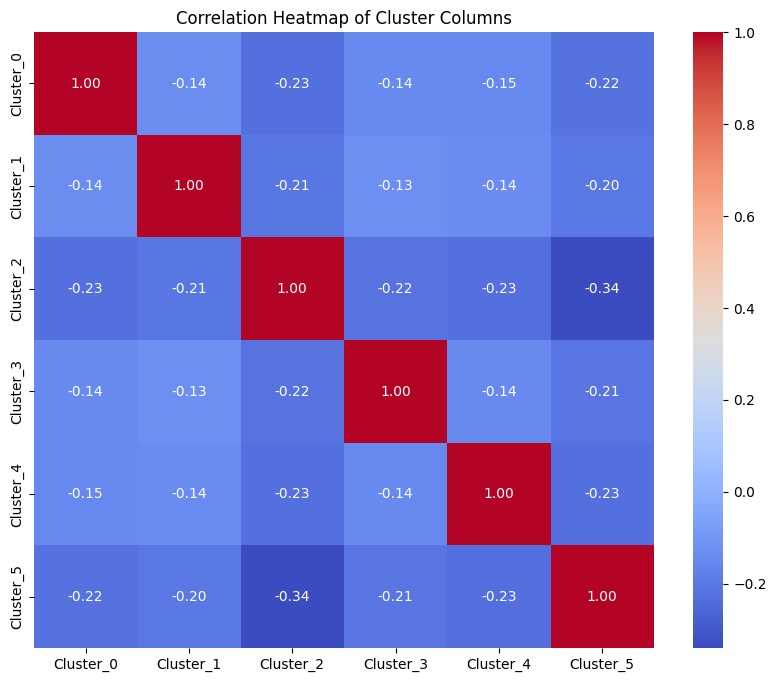

In [569]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named judges_reaction_df_encoded and includes the one-hot encoded cluster columns
# Extract just the cluster columns for correlation analysis
cluster_columns = judges_reaction_df_encoded.filter(like='Cluster_').columns
cluster_data = judges_reaction_df_encoded[cluster_columns]

# Calculate correlation matrix
corr_matrix = cluster_data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Cluster Columns')
plt.show()

In [570]:
import statsmodels.api as sm

# Ensure 'Agreement' is numeric for the logistic regression
judges_reaction_df_encoded['Agreement'] = pd.to_numeric(judges_reaction_df_encoded['Agreement'])

# Get unique judges
unique_judges = judges_reaction_df_encoded['Judge_Name'].unique()

# List to keep track of model summaries
model_summaries = {}

# Loop through each unique judge
for judge in unique_judges:
    # Filter data for the current judge
    judge_data = judges_reaction_df_encoded[judges_reaction_df_encoded['Judge_Name'] == judge]
    
    # Prepare the features and target variable
    X = judge_data[['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5']]
    y = judge_data['Agreement']
    
    # Check if there's sufficient data for this judge
    if len(judge_data) >= 20:  # Adjust this threshold as necessary
        # Fit the logistic regression model without adding a constant (no intercept)
        try:
            model = sm.Logit(y, X).fit(disp=0)  # Suppressing fit messages
            
            # Store the model summary for later review
            model_summaries[judge] = model.summary()
        except Exception as e:
            print(f"Error fitting model for Judge: {judge}\n{e}")

# Now, you can print the summary for each judge
for judge, summary in model_summaries.items():
    print(f"Model Summary for Judge: {judge}\n")
    print(summary)
    print("\n\n")


Error fitting model for Judge: Douglas Crosby
Singular matrix
Error fitting model for Judge: Glenn Trowbridge
Singular matrix
Error fitting model for Judge: Tony Weeks
Singular matrix
Error fitting model for Judge: Derek Cleary
Singular matrix
Error fitting model for Judge: Michael Bell
Singular matrix
Model Summary for Judge: Marcos Rosales

                           Logit Regression Results                           
Dep. Variable:              Agreement   No. Observations:                   37
Model:                          Logit   Df Residuals:                       31
Method:                           MLE   Df Model:                            5
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                 0.04272
Time:                        20:52:44   Log-Likelihood:                -22.317
converged:                       True   LL-Null:                       -23.313
Covariance Type:            nonrobust   LLR p-value:                    0.8503
                 coef  

c:\Users\tanne\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\tanne\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [568]:
judges_reaction_df_encoded

,Fighter_1,Fighter_2,Judge_Name,Agreement,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
0,Michael Bisping,Rashad Evans,Romulo Bittencourt,0,0,0,0,1,0,0
1,Michael Bisping,Rashad Evans,Eric Colón,1,0,0,0,1,0,0
2,Michael Bisping,Rashad Evans,Douglas Crosby,1,0,0,0,1,0,0
3,Keita Nakamura,Rob Emerson,Adalaide Byrd,1,0,0,0,0,1,0
4,Keita Nakamura,Rob Emerson,Jeff Collins,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
922,Kai Kamaka,TJ Brown,Adalaide Byrd,0,0,1,0,0,0,0
923,Kai Kamaka,TJ Brown,Sal D'Amato,1,0,1,0,0,0,0
924,Luana Carolina,Poliana Botelho,Sal D'Amato,0,0,0,0,0,0,1
925,Luana Carolina,Poliana Botelho,Dave Hagen,1,0,0,0,0,0,1


In [567]:
import statsmodels.api as sm

# Filter for Judge Derek Cleary
cleary_data = judges_reaction_df_encoded[judges_reaction_df_encoded['Judge_Name'] == 'Derek Cleary']

# Define features and target
X_cleary = cleary_data[['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5']]
y_cleary = cleary_data['Agreement']

# Check sufficient data
if len(X_cleary) >= 20:
    # Fit logistic regression model
    model_cleary = sm.Logit(y_cleary, X_cleary).fit()

    # Print the summary
    print(model_cleary.summary())
else:
    print("Not enough data for Derek Cleary.")


Not enough data for Derek Cleary.


# CLUSTERING - JUDGES

In [583]:
judges_stats.iloc[:, 0:15]

,Judge,Cluster_0_Count,Cluster_1_Count,Cluster_2_Count,Cluster_3_Count,Cluster_4_Count,Cluster_5_Count,Cluster_0_Prop,Cluster_1_Prop,Cluster_2_Prop,Cluster_3_Prop,Cluster_4_Prop,Cluster_5_Prop,Total_Count,Overall_Prop
3,Douglas Crosby,5,0,5,3,2,7,0.600,NaN,0.400000,0.666667,1.000000,0.857143,22,0.681818
8,Chris Lee,10,8,15,5,5,12,0.500,0.50,0.733333,0.600000,0.800000,0.583333,55,0.618182
9,Dave Hagen,2,1,5,3,3,8,0.500,1.00,0.400000,0.666667,0.666667,0.750000,22,0.636364
14,Sal D'Amato,8,15,13,9,16,12,0.875,0.80,0.692308,0.555556,0.687500,0.583333,73,0.698630
19,Junichiro Kamijo,3,4,5,3,1,8,1.000,0.50,0.800000,0.666667,1.000000,0.875000,24,0.791667
22,Michael Bell,0,4,5,5,4,2,NaN,0.75,0.800000,0.800000,0.250000,1.000000,20,0.700000
37,Derek Cleary,3,5,13,1,7,14,1.000,0.60,0.769231,1.000000,0.857143,0.642857,43,0.744186
40,Marcos Rosales,4,2,10,7,5,9,0.500,0.50,0.700000,0.571429,0.800000,0.777778,37,0.675676
73,Glenn Trowbridge,1,3,2,2,4,9,1.000,1.00,1.000000,0.000000,0.500000,0.333333,21,0.523810
81,Tony Weeks,1,2,7,2,6,9,1.000,1.00,0.857143,1.000000,0.500000,0.777778,27,0.777778


# WEB SCRAPING - one site

In [278]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Initialize a dictionary to store model summaries
model_summaries = {}

for judge in unique_judges:
    # Identifying the fights judged by this judge and their dissent
    is_judge = ((analysis['Judge-1-Name'] == judge) | 
                (analysis['Judge-2-Name'] == judge) | 
                (analysis['Judge-3-Name'] == judge))
    
    judge_dissents = np.select(
        [
            (analysis['Judge-1-Name'] == judge) & (analysis['Judge-1-Agreement'] == 0),
            (analysis['Judge-2-Name'] == judge) & (analysis['Judge-2-Agreement'] == 0),
            (analysis['Judge-3-Name'] == judge) & (analysis['Judge-3-Agreement'] == 0)
        ],
        [1, 1, 1],
        default=0
    )
    
    # Filter analysis DataFrame for fights judged by this judge
    judge_data = analysis[is_judge].copy()
    
    # Adding dissent information
    judge_data['Dissented'] = judge_dissents[is_judge]
    
    # One-hot encode 'Cluster'
    clusters = pd.get_dummies(judge_data['Cluster'], prefix='Cluster')
    X = clusters  # Independent variables
    y = judge_data['Dissented']  # Dependent variable
    
    # Adding a constant for the intercept
    X = sm.add_constant(X)
    
    # Check if there's sufficient data for this judge
    if len(X) > 20:  # Proceed if there are more than 20 fights judged
        # Fit the logistic regression model
        model = sm.Logit(y, X).fit(disp=0)  # Suppressing fit messages
        
        # Store the model summary for later review
        model_summaries[judge] = model.summary()

# Example: Print the model summary for the first judge
first_judge = list(model_summaries.keys())[0]
print(f"Model Summary for {first_judge}:\n", model_summaries[first_judge])


Number of judge tables found: 13
The expected number of judges was not found.


In [281]:
# Convert formatted_info into a DataFrame
df = pd.DataFrame(formatted_info, index=[0])

# Print the DataFrame
df.head(5)

,Judge-1-Name,Judge-2-Name,Judge-3-Name,Judge-1-Score,Judge-2-Score,Judge-3-Score
0,Sal D'Amato,Steve Garrean,Glenn Trowbridge,28-29,29-28,29-28


In [272]:
# Populate judge_info list with extracted data
for table in judge_tables:
    judge_name = table.find('td', class_='judge').get_text(strip=True)

    # Find all 'td' tags with class 'score'
    scores = table.find_all('td', class_='score')

    # Debugging output to check the number of judges found
    print(f"Number of judges found: {len(judge_info)}")  # Add this line for debugging

    # Check if the number of scores matches the expected number of judges
    if len(scores) != 3:
        print("Error: Unexpected number of scores found!")
        continue

    # The first 'td' in 'scores' is the label 'TOTAL', so we skip it
    # The next 'td' elements contain the total scores for each fighter
    f1_total_score = scores[1].get_text(strip=True)
    f2_total_score = scores[2].get_text(strip=True)

    # Append a dictionary with the extracted data to the 'judge_info' list
    judge_info.append({
        'judge_name': judge_name,
        'f1_total_score': f1_total_score,
        'f2_total_score': f2_total_score,
    })

print(judge_info)


TypeError: find() takes no keyword arguments

# WEB SCRAPING - many sites

In [16]:
final_df = final_df.sort_values('Date')
final_df['Fight_ID'] = np.nan
final_df['Date'] = pd.to_datetime(final_df['Date']).dt.strftime('%Y-%m-%d')

NameError: name 'np' is not defined

In [18]:
import pandas as pd
import numpy as np

# Assuming 'final_df' DataFrame is defined elsewhere

final_df = final_df.sort_values('Date')
final_df['Fight_ID'] = np.nan
final_df['Date'] = pd.to_datetime(final_df['Date']).dt.strftime('%Y-%m-%d')

actual_ids_dates = [
    (902, '2007-11-17'),
    (956, '2008-02-02'), 
    (1083, '2008-09-17'),
    (1264, '2009-06-20'),
    (2355, '2011-03-03'),
    (3691, '2012-09-29'),
    (4344, '2013-07-27'),
    (5739, '2014-12-06'),
    (8519, '2017-10-28'),
    (9310, '2018-08-25'),
    (11887, '2021-05-01')
]

actual_ids_dates = [(id_, pd.Timestamp(date)) for id_, date in actual_ids_dates]

# Sort the anchor points by date
actual_ids_dates.sort(key=lambda x: x[1])

# Initialize an empty dictionary to store the interpolated IDs
interpolated_id_dict = {}

# Interpolate the IDs between each pair of adjacent anchor points
for i in range(len(actual_ids_dates) - 1):
    start_id, start_date = actual_ids_dates[i]
    end_id, end_date = actual_ids_dates[i + 1]
    
    # Generate dates between start_date and end_date (inclusive) at daily intervals
    interpolated_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Calculate the corresponding interpolated IDs for the interpolated dates
    # This calculates the slope of the line connecting the two anchor points and applies it to the range of dates
    total_days = (end_date - start_date).days
    id_increment_per_day = (end_id - start_id) / total_days
    interpolated_ids = np.round(start_id + (interpolated_dates - start_date).days * id_increment_per_day)
    
    # Update the dictionary with the interpolated IDs for the corresponding dates
    interpolated_id_dict.update(dict(zip(interpolated_dates, interpolated_ids)))

# Map the interpolated IDs to the 'Date' column of the DataFrame
final_df['Fight_ID'] = final_df['Date'].map(interpolated_id_dict).astype('Int64')

final_df.head()


,Date,Event-Code,Total-Rounds,Fighter_1,Fighter_2,F1_W,Decision - Split,Judge-1-Name,F1_Judge-1-Score,Judge-2-Name,...,Knockdowns_Diff,Significant-Strike-Land_Diff,Significant-Strike-Attempt_Diff,Total-Strikes-Land_Diff,Total-Strikes-Attempt_Diff,Takedown-Success_Diff,Takedown-Land_Diff,Control-Time-Sec_Diff,Cluster,Fight_ID
302,2003-02-28,bba678d312590087,3,Din Thomas,Matt Serra,1,1,Steve Rice,28 - 30,Doug Crosby,...,0,3,-20,17,-5,-1,-28,19,0,<NA>
448,2004-04-02,e8fb8e53bc2e29d6,3,Hermes Franca,Yves Edwards,0,1,Cecil Peoples,29 - 28,Tony Weeks,...,0,13,-1,3,-12,-4,-10,64,2,<NA>
628,2004-08-21,b4bc2e3353a770b5,3,Karo Parisyan,Nick Diaz,1,1,Dalby Shirley,29 - 28,Cecil Peoples,...,0,-10,-23,-73,-85,8,13,336,2,<NA>
1072,2005-02-05,85d905f7c4f5a1af,3,Tito Ortiz,Vitor Belfort,1,1,Nelson Hamilton,28 - 29,Cecil Peoples,...,0,8,9,57,65,4,11,377,2,<NA>
194,2005-08-06,3f24c96753dbd9f9,3,Chris Leben,Patrick Cote,1,1,Jon Schorle,28 - 29,Roy Silbert,...,0,0,0,155,167,0,3,426,2,<NA>


In [31]:
practice = final_df[['Fighter_1', 'Fighter_2', 'Fight_ID', 'F1_W']].dropna(subset = 'Fight_ID')
practice

,Fighter_1,Fighter_2,Fight_ID,F1_W
800,Michael Bisping,Rashad Evans,902,0
636,Keita Nakamura,Rob Emerson,956,0
180,Cheick Kongo,Heath Herring,972,0
944,Rich Clementi,Sam Stout,999,1
509,Jess Liaudin,Paul Taylor,1026,0
...,...,...,...,...
620,Justine Kish,Tracy Cortez,11850,0
522,Jessica Penne,Loopy Godinez,11850,1
320,Dwight Grant,Stefan Sekulic,11869,1
622,Kai Kamaka,TJ Brown,11887,0


In [32]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from unidecode import unidecode
from concurrent.futures import ThreadPoolExecutor, as_completed
import fuzzywuzzy

from fuzzywuzzy import fuzz

def normalize_text(text, for_comparison=True):
    """Normalize text for reliable matching: remove HTML tags, accents, and special characters.
       Set `for_comparison` to False to keep the original text formatting."""
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    if for_comparison:
        text = unidecode(text)  # Transliterate to closest ASCII representation
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keep only alphanumeric characters and spaces
        text = re.sub(r'\s+', ' ', text)  # Normalize whitespace to single spaces
        return text.lower()
    return text

def is_correct_page(soup, fighter_1, fighter_2, threshold=90):
    """Check if the page contains both fighters' names with fuzzy matching."""
    page_text = normalize_text(str(soup), for_comparison=True)
    fighter_1_normalized = normalize_text(fighter_1, for_comparison=True)
    fighter_2_normalized = normalize_text(fighter_2, for_comparison=True)
    
    # Use fuzzy matching to check for fighter names in the page text
    match_1 = fuzz.partial_ratio(fighter_1_normalized, page_text)
    match_2 = fuzz.partial_ratio(fighter_2_normalized, page_text)
    
    # Both names must meet or exceed the threshold to consider the page correct
    return match_1 >= threshold and match_2 >= threshold

def extract_judge_info(soup):
    """Extract judges' names and scores from the page, without altering judge names."""
    judge_info = {}
    judge_names = soup.find_all('td', class_='judge')
    # Find all 'td' elements for scores, then navigate to 'b' tag for the actual scores
    left_scores = [td.find('b').text for td in soup.find_all('td', class_='bottom-cell', align='center')]
    right_scores = left_scores[1::2]  # Assuming the pattern is left-right-left-right for scores, extract every second element starting from the second
    left_scores = left_scores[::2]  # Extract every second element starting from the first

    for i, (judge, left_score, right_score) in enumerate(zip(judge_names, left_scores, right_scores), start=1):
        # Extract judge names without normalizing
        judge_name = normalize_text(judge.get_text(), for_comparison=False)
        judge_info[f'Judge-{i}-Name'] = judge_name.strip()  # .strip() to remove leading/trailing whitespace
        # Scores are already extracted as text, so just format them
        judge_info[f'Judge-{i}-Score'] = f"{left_score}-{right_score}"

        if i == 3:  # Only consider up to 3 judges
            break

    return judge_info

from concurrent.futures import ThreadPoolExecutor, as_completed

def process_fight(fighter_1, fighter_2, estimated_fight_id, f1_won):
    print(f"Starting: {fighter_1} vs {fighter_2}")
    winning_fighter, losing_fighter = (fighter_1, fighter_2) if f1_won == 1 else (fighter_2, fighter_1)
    for fight_id in range(estimated_fight_id - 50, estimated_fight_id + 51):
        url = f"http://mmadecisions.com/decision/{fight_id}/{winning_fighter.replace(' ', '-')}-vs-{losing_fighter.replace(' ', '-')}"
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            if is_correct_page(soup, fighter_1, fighter_2):
                judge_info = extract_judge_info(soup)
                print(f"Completed: {fighter_1} vs {fighter_2} | Fight ID: {fight_id}")
                return {'Fighter_1': fighter_1, 'Fighter_2': fighter_2, 'Fight_ID': fight_id, 'F1_W': f1_won, **judge_info}
    print(f"Failed to find correct page for: {fighter_1} vs {fighter_2}")
    return None

def main(practice):
    with ThreadPoolExecutor(max_workers=10) as executor:
        futures = []
        for index, row in practice.iterrows():
            future = executor.submit(process_fight, row['Fighter_1'], row['Fighter_2'], row['Fight_ID'], row['F1_W'])
            futures.append(future)
            
        results = []
        for future in as_completed(futures):
            result = future.result()
            if result:
                results.append(result)
                # You can also print something here if you want to signal the completion of processing

    fight_data_df = pd.DataFrame(results)
    return fight_data_df

# Assuming 'practice' is your DataFrame
# Call the main function and pass your DataFrame
if __name__ == '__main__':
    fight_data_df = main(practice)
    if not fight_data_df.empty:
        print("Data extraction complete. Displaying partial data:")
        print(fight_data_df.head())
    else:
        print("No data was extracted. Please check the input and URL patterns.")


Starting: Michael Bisping vs Rashad Evans
Starting: Keita Nakamura vs Rob Emerson
Starting: Cheick Kongo vs Heath Herring
Starting: Rich Clementi vs Sam Stout
Starting: Jess Liaudin vs Paul Taylor
Starting: Nate Marquardt vs Thales Leites
Starting: Evan Tanner vs Kendall Grove
Starting: Patrick Cote vs Ricardo Almeida
Starting: Dong Hyun Kim vs Matt Brown
Starting: Roan Carneiro vs Ryo Chonan
Completed: Jess Liaudin vs Paul Taylor | Fight ID: 1011
Starting: Alan Belcher vs Ed Herman
Completed: Nate Marquardt vs Thales Leites | Fight ID: 1017
Starting: Josh Neer vs Nate Diaz
Completed: Keita Nakamura vs Rob Emerson | Fight ID: 956
Starting: Akihiro Gono vs Dan Hardy
Completed: Evan Tanner vs Kendall Grove | Fight ID: 1031
Starting: Brandon Vera vs Keith Jardine
Completed: Rich Clementi vs Sam Stout | Fight ID: 990
Starting: George Roop vs Shane Nelson
Completed: Patrick Cote vs Ricardo Almeida | Fight ID: 1039
Starting: Chris Lytle vs Marcus Davis
Completed: Cheick Kongo vs Heath Herrin

In [33]:
fight_data_df

,Fighter_1,Fighter_2,Fight_ID,F1_W,Judge-1-Name,Judge-1-Score,Judge-2-Name,Judge-2-Score,Judge-3-Name,Judge-3-Score
0,Jess Liaudin,Paul Taylor,1011,0,Barry Foley,28-29,Jeff Mullen,29-28,Andy Roberts,29-28
1,Nate Marquardt,Thales Leites,1017,0,Nelson Hamilton,28-27,Cecil Peoples,28-27,Chris Watts,27-28
2,Keita Nakamura,Rob Emerson,956,0,Adalaide Byrd,30-27,Jeff Collins,28-29,Al Lefkowitz,30-27
3,Evan Tanner,Kendall Grove,1031,0,Al Lefkowitz,28-29,Marcos Rosales,30-26,Glenn Trowbridge,30-26
4,Rich Clementi,Sam Stout,990,1,Douglas Crosby,29-27,Sylvain Leblanc,28-29,Pasquale Procopio,29-28
...,...,...,...,...,...,...,...,...,...,...
304,Justine Kish,Tracy Cortez,11856,0,Derek Cleary,29-28,Sal D'Amato,28-29,Rick Winter,30-27
305,Alexander Munoz,Luis Pena,11857,0,Michael Bell,28-29,Sal D'Amato,29-28,Rick Winter,29-28
306,Kai Kamaka,TJ Brown,11887,0,Michael Bell,29-28,Adalaide Byrd,27-30,Sal D'Amato,29-28
307,Luana Carolina,Poliana Botelho,11889,1,Sal D'Amato,28-29,Dave Hagen,29-28,Junichiro Kamijo,29-28


In [23]:
fight_data_df['Judge-1-Name'] = fight_data_df['Judge-1-Name'].str.title()
fight_data_df['Judge-2-Name'] = fight_data_df['Judge-2-Name'].str.title()
fight_data_df['Judge-3-Name'] = fight_data_df['Judge-3-Name'].str.title()

In [24]:
fight_data_df.drop(['F1_W', 'Fight_ID'], axis = 1)

,Fighter_1,Fighter_2,Judge-1-Name,Judge-1-Score,Judge-2-Name,Judge-2-Score,Judge-3-Name,Judge-3-Score
0,Andre Ewell,Irwin Rivera,Michael Bell,29-28,Dave Hagen,29-28,Junichiro Kamijo,28-29
1,Angela Hill,Michelle Waterson,Derek Cleary,48-47,Sal Damato,49-46,Chris Lee,47-48
2,Darren Stewart,Kevin Holland,Eric Colon,29-28,Sal Damato,29-28,Ron Mccarthy,28-29
3,Frankie Edgar,Pedro Munhoz,Derek Cleary,48-47,Eric Colon,48-47,Sal Damato,46-49
4,Jessica Andrade,Rose Namajunas,Mark Collett,28-29,Anders Ohlsson,29-28,Vito Paolillo,29-28
5,Carla Esparza,Marina Rodriguez,Ben Cartlidge,29-28,Anders Ohlsson,28-29,Clemens Werner,30-27
6,Mauricio Rua,Rogerio Nogueira,Ben Cartlidge,29-28,Mark Collett,28-29,David Lethaby,29-28
7,Hakeem Dawodu,Zubaira Tukhugov,Ahmed Korchi,29-28,Anders Ohlsson,30-27,Dave Tirelli,28-29
8,Casey Kenney,Dominick Cruz,Michael Bell,28-29,Derek Cleary,29-28,Sal Damato,30-27
9,Carlos Felipe,Justin Tafa,Lukasz Bosacki,29-28,Anders Ohlsson,28-29,Paul Sutherland,29-28


In [36]:
fight_data_df.to_csv('fight_data.csv', index=False, encoding = 'utf-8-sig')

# JOINING SCRAPED DATA